Entrenar y validad una red neuronal tipo perceptron que sea capaz de realizar una clasificación binaria de datos linealmente separables

In [27]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.datasets import load_iris


In [28]:
iris = load_iris(as_frame=True)
print("El total de caracteristicas independientes en el dataset es: ", iris.feature_names)
print("Caracteristicas independientes a usar son:", iris.feature_names[2:4])
print("El total de clases en el dataset es: ", iris.target_names)
print("Clases a usar son:", iris.target_names[0:2])

El total de caracteristicas independientes en el dataset es:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Caracteristicas independientes a usar son: ['petal length (cm)', 'petal width (cm)']
El total de clases en el dataset es:  ['setosa' 'versicolor' 'virginica']
Clases a usar son: ['setosa' 'versicolor']


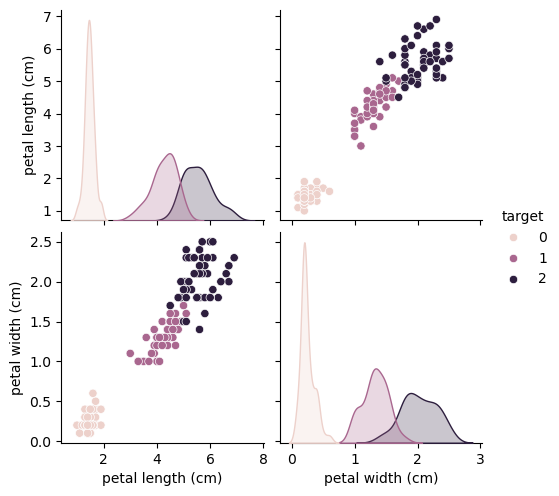

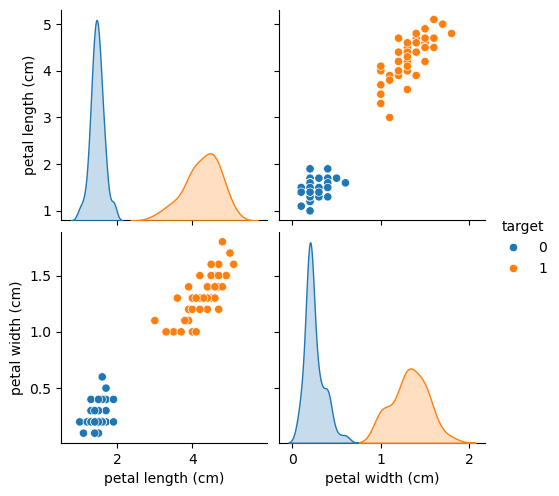

In [29]:
df = pd.DataFrame(data=iris.data.iloc[:,[2,3]], columns=iris.feature_names[2:4])
df['target'] = iris.target
sns.pairplot(df, hue='target')
i = df.index[df['target'] == 2].tolist()
df = df.drop(i)
sns.pairplot(df, hue='target')

In [32]:
variableX = iris.data
variableX = iris.data.iloc[:,[2,3]]
variableY = iris.target
print("Las variables independientes son: ", variableX)
# remove one class to make linearly separable
variabeleX = variableX.drop(i)
variableY = variableY.drop(i)
variableX = variableX[:100]
print(f"El tamaño de la variable X es: {variableX.shape}")
print(f"El tamaño de la variable Y es: {variableY.shape}")

Las variables independientes son:       petal length (cm)  petal width (cm)
0                  1.4               0.2
1                  1.4               0.2
2                  1.3               0.2
3                  1.5               0.2
4                  1.4               0.2
..                 ...               ...
145                5.2               2.3
146                5.0               1.9
147                5.2               2.0
148                5.4               2.3
149                5.1               1.8

[150 rows x 2 columns]
El tamaño de la variable X es: (100, 2)
El tamaño de la variable Y es: (100,)


In [35]:
x_train, x_test, y_train, y_test = train_test_split(variableX, variableY, test_size=0.2)
model = Perceptron(random_state=42)
model.fit(x_train, y_train)

Perceptron(random_state=42)

In [36]:
y_pred = model.predict(x_test)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"El f1 score es: {f1}")

percent = model.score(x_test, y_test)
print(f"El porcentaje de aciertos es: {percent*100}%")

El f1 score es: 1.0
El porcentaje de aciertos es: 100.0%
